## SVM Concept

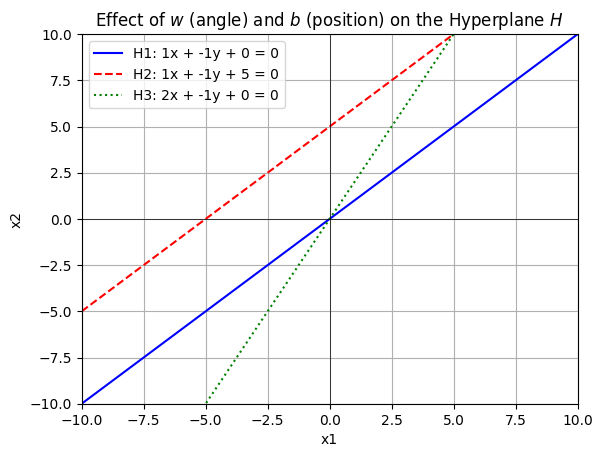

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two different w and b to show their effects
w1 = np.array([1, -1])  # Orientation: diagonal
w2 = np.array([2, -1])  # Steeper orientation
b1 = 0                  # Position: through origin
b2 = 5                  # Position: shifted up

# Define the hyperplane H: w^T x + b = 0
x = np.linspace(-10, 10, 100)
y1 = -(w1[0] * x + b1) / w1[1]  # Hyperplane 1
y2 = -(w1[0] * x + b2) / w1[1]  # Hyperplane 2 (same w, different b)
y3 = -(w2[0] * x + b1) / w2[1]  # Hyperplane 3 (different w, same b)

# Plot the hyperplanes
plt.plot(x, y1, label=f'H1: {w1[0]}x + {w1[1]}y + {b1} = 0', color='blue')
plt.plot(x, y2, label=f'H2: {w1[0]}x + {w1[1]}y + {b2} = 0', color='red', linestyle='--')
plt.plot(x, y3, label=f'H3: {w2[0]}x + {w2[1]}y + {b1} = 0', color='green', linestyle=':')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Effect of $w$ (angle) and $b$ (position) on the Hyperplane $H$')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

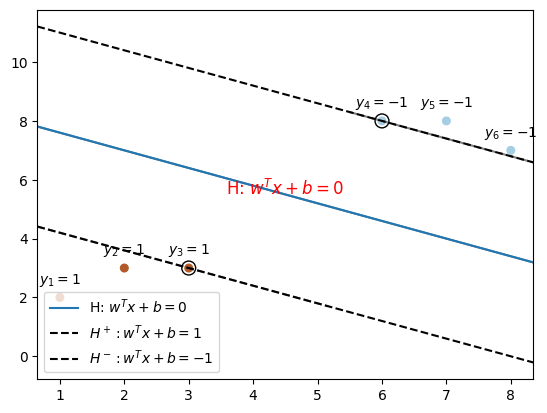

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Example data
X = np.array([[1, 2], [2, 3], [3, 3], [6, 8], [7, 8], [8, 7]])
y = np.array([1, 1, 1, -1, -1, -1])

# Fit the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Annotate w, b, y, H
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot the separating hyperplane H
x_plot = np.linspace(xlim[0], xlim[1], 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, label=f'H: $w^T x + b = 0$')

# Annotate H near the line
mid_x = (xlim[0] + xlim[1]) / 2
mid_y = -(w[0] * mid_x + b) / w[1]
plt.text(mid_x, mid_y, 'H: $w^T x + b = 0$', color='red', fontsize=12, ha='center')

# Plot the margin hyperplanes H^+ and H^-
y_plot_plus = -(w[0] * x_plot + b - 1) / w[1]
y_plot_minus = -(w[0] * x_plot + b + 1) / w[1]
plt.plot(x_plot, y_plot_plus, 'k--', label='$H^+: w^T x + b = 1$')
plt.plot(x_plot, y_plot_minus, 'k--', label='$H^-: w^T x + b = -1$')

# Annotate y
for i, txt in enumerate(y):
    plt.annotate(f'$y_{i+1}={txt}$', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.show()

Dot product of w and a vector on H: 0.0 (should be close to 0)


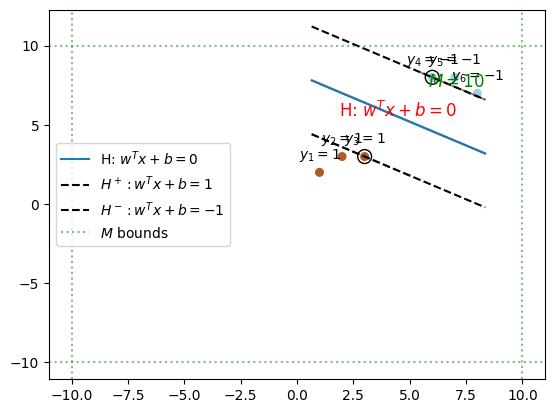

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Example data
X = np.array([[1, 2], [2, 3], [3, 3], [6, 8], [7, 8], [8, 7]])
y = np.array([1, 1, 1, -1, -1, -1])

# Fit the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# Annotate w, b, y, H
w = clf.coef_[0]
b = clf.intercept_[0]

# Plot the separating hyperplane H
x_plot = np.linspace(xlim[0], xlim[1], 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, label=f'H: $w^T x + b = 0$')

# Annotate H near the line
mid_x = (xlim[0] + xlim[1]) / 2
mid_y = -(w[0] * mid_x + b) / w[1]
plt.text(mid_x, mid_y, 'H: $w^T x + b = 0$', color='red', fontsize=12, ha='center')

# Plot the margin hyperplanes H^+ and H^-
y_plot_plus = -(w[0] * x_plot + b - 1) / w[1]
y_plot_minus = -(w[0] * x_plot + b + 1) / w[1]
plt.plot(x_plot, y_plot_plus, 'k--', label='$H^+: w^T x + b = 1$')
plt.plot(x_plot, y_plot_minus, 'k--', label='$H^-: w^T x + b = -1$')

# Ensure w is perpendicular to H
# w is already perpendicular to H by definition, but we can verify this
# by checking the dot product of w and any vector parallel to H
vector_on_H = np.array([1, -w[0]/w[1]])  # A vector parallel to H
dot_product = np.dot(w, vector_on_H)
print(f"Dot product of w and a vector on H: {dot_product} (should be close to 0)")

# Annotate y
for i, txt in enumerate(y):
    plt.annotate(f'$y_{i+1}={txt}$', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Add M to the visualization
M = 10  # Example value for M
plt.text(xlim[1], ylim[1], f'$M = {M}$', color='green', fontsize=12, ha='right', va='top')
plt.axhline(M, color='green', linestyle=':', alpha=0.5, label='$M$ bounds')
plt.axhline(-M, color='green', linestyle=':', alpha=0.5)
plt.axvline(M, color='green', linestyle=':', alpha=0.5)
plt.axvline(-M, color='green', linestyle=':', alpha=0.5)

plt.legend()
plt.show()

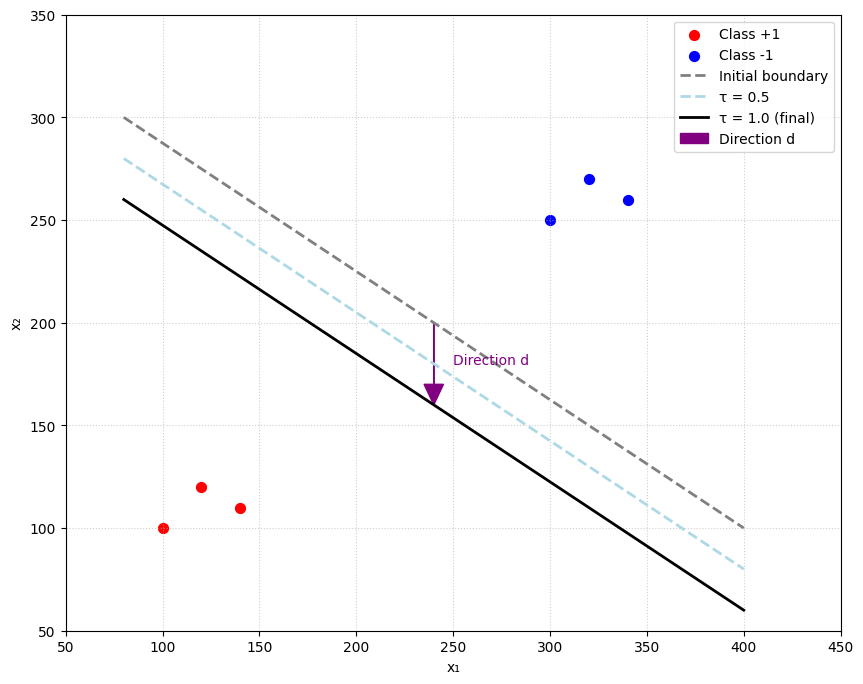

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Data points
# Class +1 (red points)
x1_pos = [100, 120, 140]
y1_pos = [100, 120, 110]
# Class -1 (blue points)
x2_pos = [300, 320, 340]
y2_pos = [250, 270, 260]

# Plot data points
ax.scatter(x1_pos, y1_pos, color='red', s=50, label='Class +1')
ax.scatter(x2_pos, y2_pos, color='blue', s=50, label='Class -1')

# Plot decision boundaries
# Initial boundary (gray dashed)
x = np.array([80, 400])
y_initial = np.array([300, 100])
ax.plot(x, y_initial, color='gray', linestyle='--', linewidth=2, label='Initial boundary')

# Middle boundary (light blue dashed) - τ = 0.5
y_middle = np.array([280, 80])
ax.plot(x, y_middle, color='lightblue', linestyle='--', linewidth=2, label='τ = 0.5')

# Final boundary (black solid) - τ = 1.0
y_final = np.array([260, 60])
ax.plot(x, y_final, color='black', linewidth=2, label='τ = 1.0 (final)')

# Direction arrow
ax.arrow(240, 200, 0, -30, head_width=10, head_length=10,
         fc='purple', ec='purple', label='Direction d')
ax.text(250, 180, 'Direction d', color='purple')

# Set axis labels
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')

# Set axis limits
ax.set_xlim(50, 450)
ax.set_ylim(50, 350)

# Add legend
ax.legend()

# Add grid
ax.grid(True, linestyle=':', alpha=0.6)

plt.show()

## SVM Application

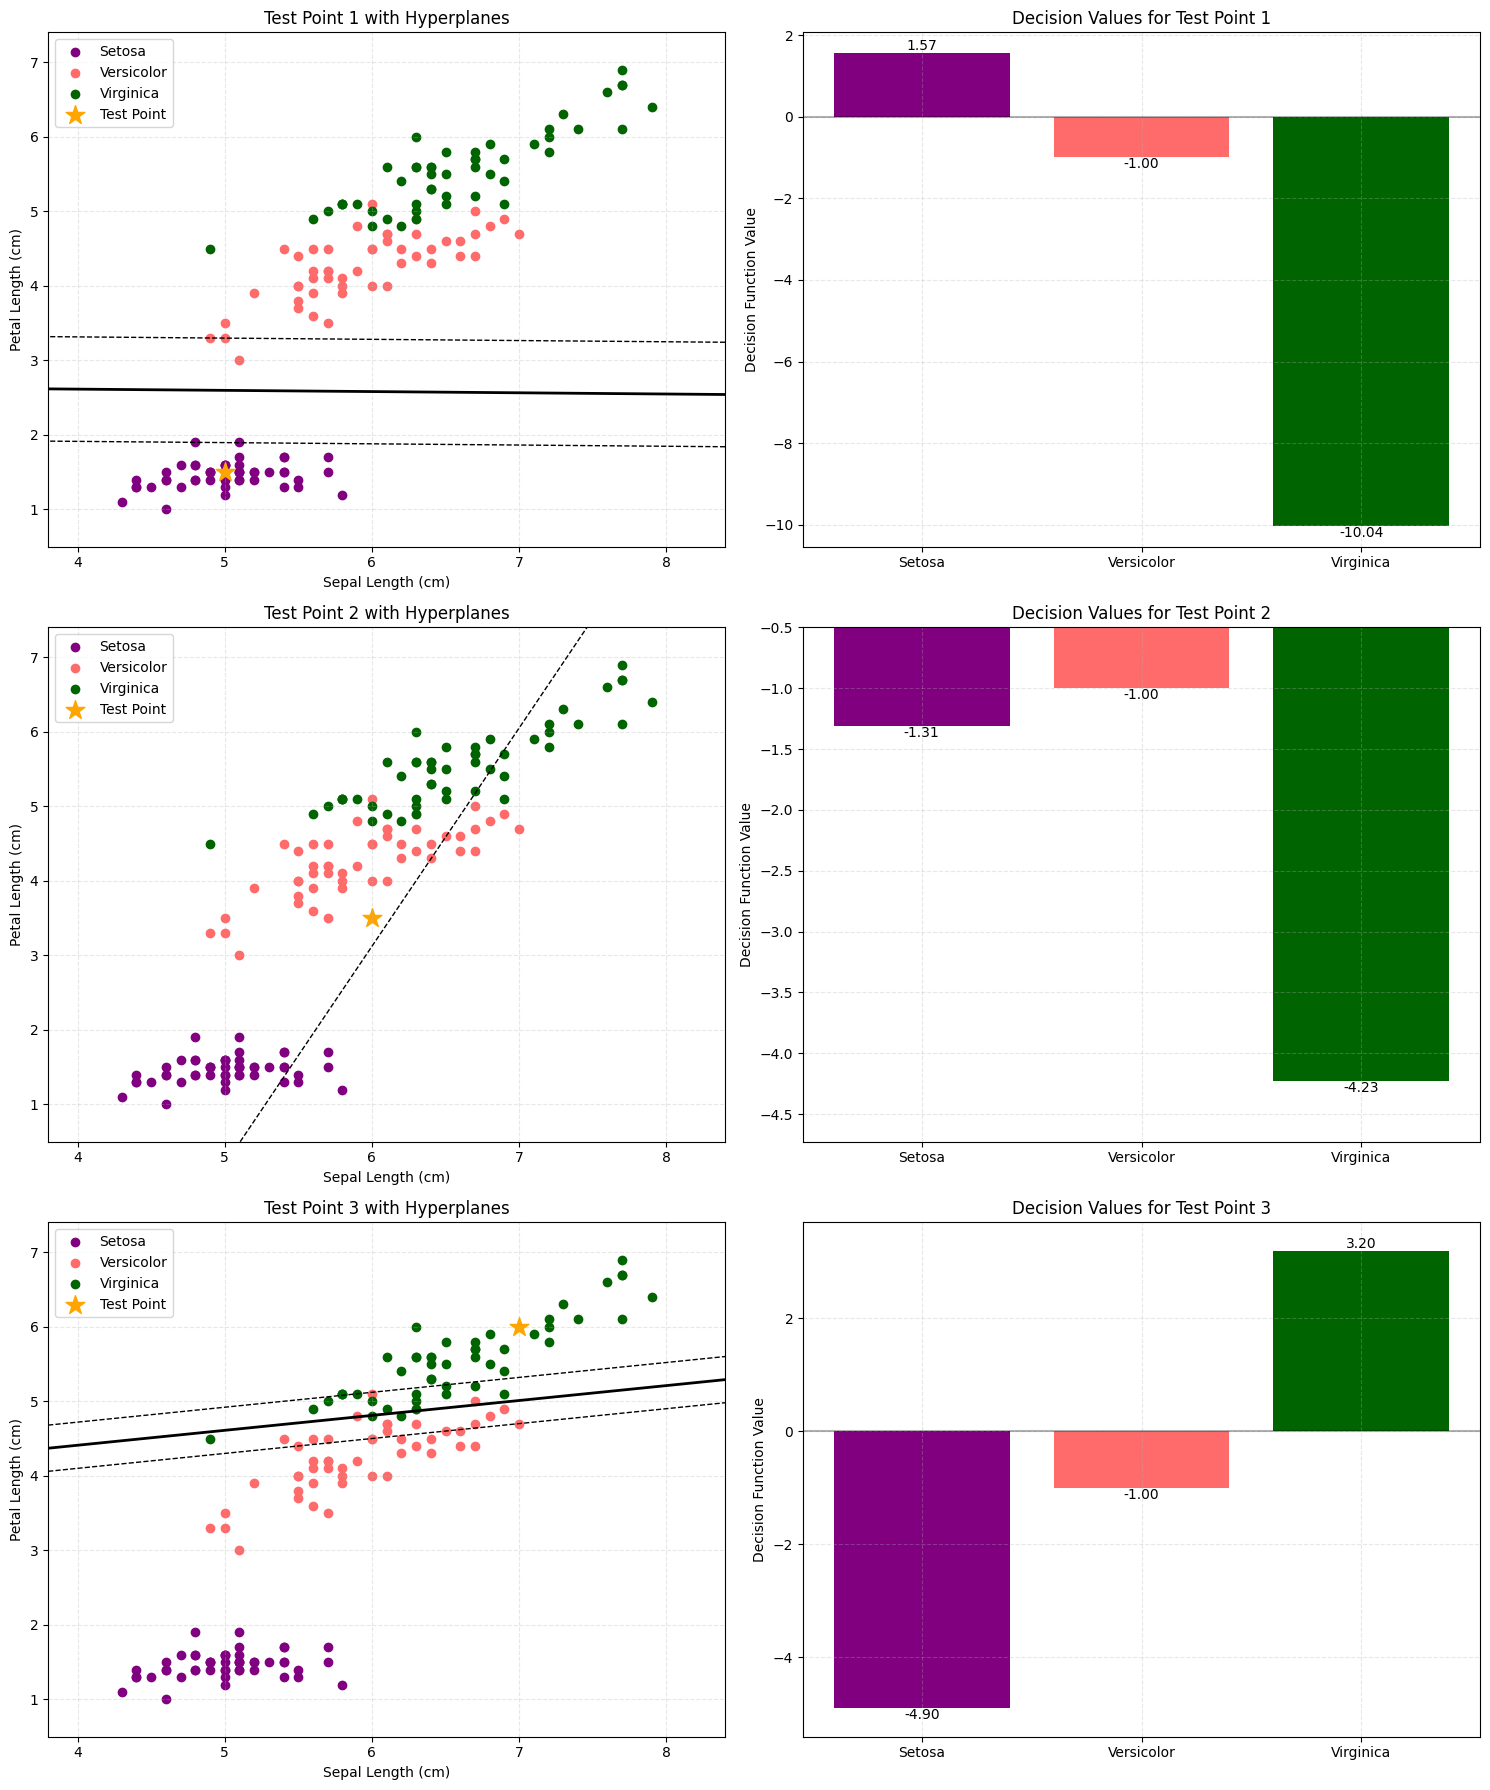


Test Point 1 ([5.  1.5]):
Setosa: 1.57
Versicolor: -1.00
Virginica: -10.04
Classification: Setosa

Test Point 2 ([6.  3.5]):
Setosa: -1.31
Versicolor: -1.00
Virginica: -4.23
Classification: Versicolor

Test Point 3 ([7. 6.]):
Setosa: -4.90
Versicolor: -1.00
Virginica: 3.20
Classification: Virginica


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Read the CSV file
data = pd.read_csv('Data.csv', header=None)
X = data.iloc[:, [0, 2]].values  # sepal length and petal length
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = data.iloc[:, -1].map(label_map).values

# Colors for classes
colors = ['#800080', '#ff6b6b', '#006400']  # Purple, Red, Dark Green
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Train SVMs
classifiers = []
for i in range(3):
    y_binary = np.where(y == i, 1, -1)
    clf = svm.SVC(kernel='linear')
    clf.fit(X, y_binary)
    classifiers.append(clf)

# Test points
test_points = np.array([
    [5.0, 1.5],  # Should be Setosa
    [6.0, 3.5],  # Should be Versicolor
    [7.0, 6.0]   # Should be Virginica
])

# Create figure
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

for idx, test_point in enumerate(test_points):
    ax1 = axes[idx, 0]
    ax2 = axes[idx, 1]

    # Plot data points
    for i in range(3):
        mask = y == i
        ax1.scatter(X[mask, 0], X[mask, 1],
                   color=colors[i],
                   label=class_names[i],
                   alpha=1)

    # Add test point
    ax1.scatter(test_point[0], test_point[1],
                color='orange', marker='*', s=200,
                label='Test Point')

    # Create grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Plot hyperplanes for current binary classification
    Z = classifiers[idx].decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax1.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black',
                linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

    # Get and plot decision values
    decision_values = [clf.decision_function(test_point.reshape(1, -1))[0]
                      for clf in classifiers]

    # Plot decision values
    bars = ax2.bar(class_names, decision_values, color=colors)
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # Add value labels on bars
    for bar, val in zip(bars, decision_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.2f}',
                ha='center', va='bottom' if height >= 0 else 'top')

    # Customize plots
    ax1.set_xlabel('Sepal Length (cm)')
    ax1.set_ylabel('Petal Length (cm)')
    ax1.set_title(f'Test Point {idx+1} with Hyperplanes')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.3)

    ax2.set_ylabel('Decision Function Value')
    ax2.set_title(f'Decision Values for Test Point {idx+1}')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_ylim(min(decision_values) - 0.5, max(decision_values) + 0.5)

plt.tight_layout()
plt.show()

# Print classification results
for idx, test_point in enumerate(test_points):
    print(f"\nTest Point {idx+1} ({test_point}):")
    decision_values = [clf.decision_function(test_point.reshape(1, -1))[0]
                      for clf in classifiers]
    for i, val in enumerate(decision_values):
        print(f"{class_names[i]}: {val:.2f}")
    print(f"Classification: {class_names[np.argmax(decision_values)]}")